In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [2]:
register_matplotlib_converters()
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

In [3]:
test_data = pd.read_csv('/Users/baconbaker/Documents/Studium/ANM/anm-project/data/test_data/esb.csv')
train_data = pd.read_csv('/Users/baconbaker/Documents/Studium/ANM/anm-project/data/train_data/esb.csv')
train_data['start_time'] = train_data['startTime']
print(train_data.head())
print(test_data.head())

  serviceName      startTime  avg_time  num  succee_num  succee_rate  \
0     osb_001  1588521600000    0.5691  347         347          1.0   
1     osb_001  1588521660000    0.5813  354         354          1.0   
2     osb_001  1588521720000    0.5397  363         363          1.0   
3     osb_001  1588521780000    0.6190  387         387          1.0   
4     osb_001  1588521840000    0.4909  387         387          1.0   

      start_time  
0  1588521600000  
1  1588521660000  
2  1588521720000  
3  1588521780000  
4  1588521840000  
  service_name     start_time  avg_time  num  succee_num  succee_rate
0      osb_001  1606881600000    0.6214  361         361       1.0000
1      osb_001  1606881660000    0.5861  343         343       1.0000
2      osb_001  1606881720000    5.0125  126         122       0.9683
3      osb_001  1606881780000    9.3487   70          70       1.0000
4      osb_001  1606881840000    1.4756  375         375       1.0000


In [4]:
def get_onehot(df):
    df['start_time'] = pd.to_datetime(df['start_time'], unit='ms', origin='unix')
    df = df.sort_values(by='start_time')
    df = df.set_index('start_time')
    return df

In [5]:
4

4

In [6]:
test_data

,service_name,start_time,avg_time,num,succee_num,succee_rate
0,osb_001,1606881600000,0.6214,361,361,1.0000
1,osb_001,1606881660000,0.5861,343,343,1.0000
2,osb_001,1606881720000,5.0125,126,122,0.9683
3,osb_001,1606881780000,9.3487,70,70,1.0000
4,osb_001,1606881840000,1.4756,375,375,1.0000
...,...,...,...,...,...,...
714,osb_001,1606866840000,0.6631,539,539,1.0000
715,osb_001,1606866900000,0.6083,542,542,1.0000
716,osb_001,1606866960000,0.5766,536,536,1.0000
717,osb_001,1606867020000,0.6536,525,525,1.0000


In [7]:
train_data

,serviceName,startTime,avg_time,num,succee_num,succee_rate,start_time
0,osb_001,1588521600000,0.5691,347,347,1.0,1588521600000
1,osb_001,1588521660000,0.5813,354,354,1.0,1588521660000
2,osb_001,1588521720000,0.5397,363,363,1.0,1588521720000
3,osb_001,1588521780000,0.6190,387,387,1.0,1588521780000
4,osb_001,1588521840000,0.4909,387,387,1.0,1588521840000
...,...,...,...,...,...,...,...
1434,osb_001,1588607700000,0.6240,600,600,1.0,1588607700000
1435,osb_001,1588607760000,0.5897,643,643,1.0,1588607760000
1436,osb_001,1588607820000,0.6495,619,619,1.0,1588607820000
1437,osb_001,1588607880000,0.6262,614,614,1.0,1588607880000


In [8]:
from statsmodels.tsa.seasonal import STL

data_train = train_data['avg_time']
data_test = test_data['avg_time']

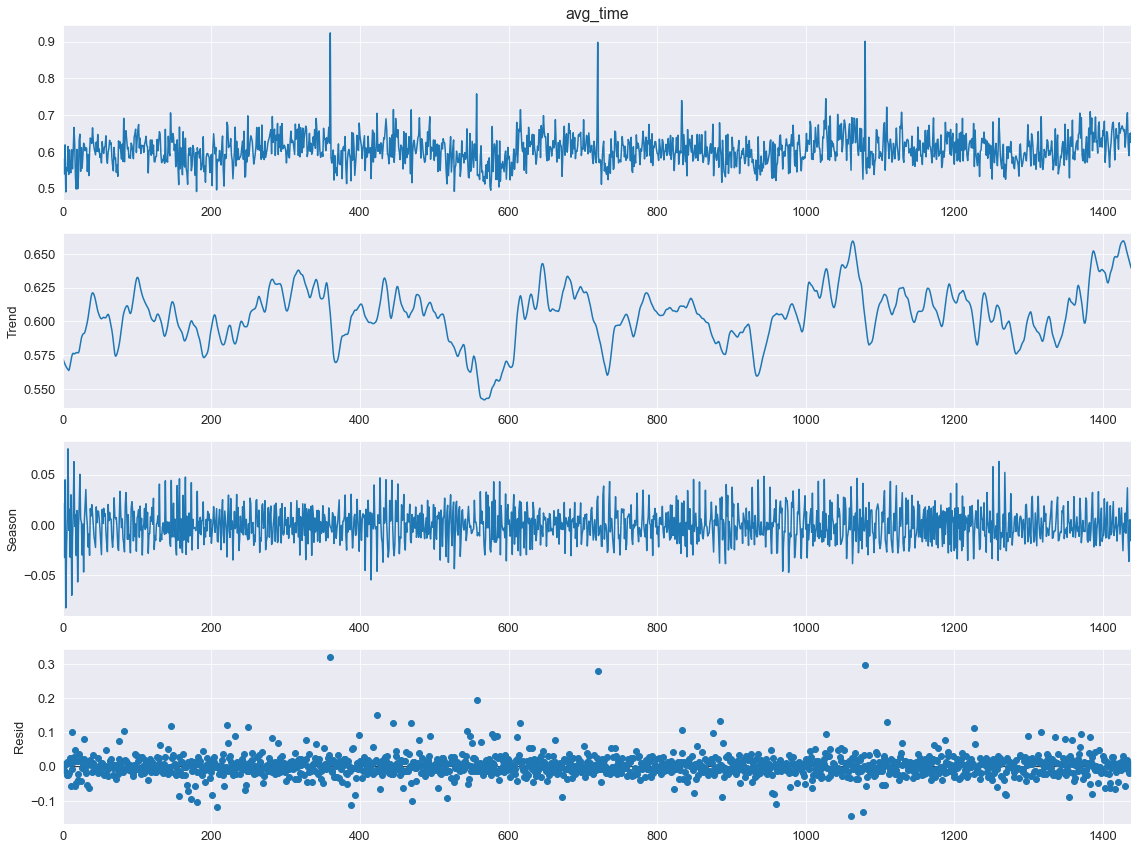

In [13]:
stl = STL(data_train, period=8, robust=True)
res = stl.fit()
fig = res.plot()

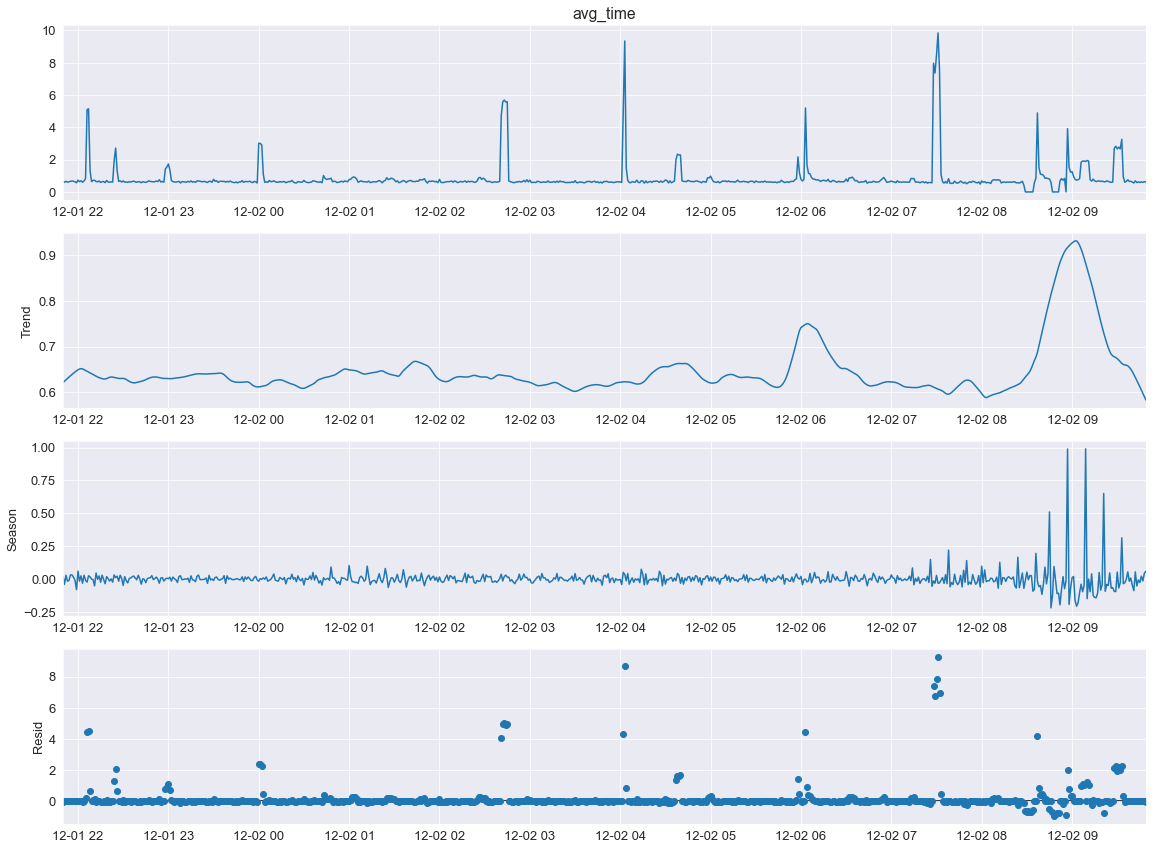

In [173]:
stl = STL(data_test, period=12, robust=True)
res = stl.fit()
fig = res.plot()